In [30]:
##Characterization of Covid-19 images using Complex Networks
##Author: Josimcar Chire
##Github: jecs89

In [1]:
from IPython.core.display import display, HTML
display(HTML\
        ("<style>.container { \
        width:100% !important; \
        }</style>"))
display(HTML\
        ("<style>.input_prompt{ \
        min-width: 1ex; \
        }</style>"))

In [2]:
import imageio as io
import matplotlib.pyplot as plt
import numpy as np

In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
import os

files_true = []
prefix_pos = './dataset/COVID/'

for i in os.listdir(prefix_pos):
    if i.endswith('.png'):
        files_true.append(i)
files_true.sort()
print(files_true[0:10])

['Covid (1).png', 'Covid (10).png', 'Covid (100).png', 'Covid (1000).png', 'Covid (1001).png', 'Covid (1002).png', 'Covid (1003).png', 'Covid (1004).png', 'Covid (1005).png', 'Covid (1006).png']


In [4]:
import os

files_negative = []
prefix_neg = './dataset/non-COVID/'

for i in os.listdir(prefix_neg):
    if i.endswith('.png'):
        files_negative.append(i)
files_negative.sort()
print(files_negative[0:10])

['Non-Covid (1).png', 'Non-Covid (10).png', 'Non-Covid (100).png', 'Non-Covid (1000).png', 'Non-Covid (1001).png', 'Non-Covid (1002).png', 'Non-Covid (1003).png', 'Non-Covid (1004).png', 'Non-Covid (1005).png', 'Non-Covid (1006).png']


In [7]:
imgs = []
# fig = plt.figure(figsize=[25,15])
for i in range(0,200):
    img = io.imread(prefix_pos+files_true[i])
    img = np.ceil(0.3 * img[:,:,0]) + (0.59 * img[:,:,1]) + (0.11 * img[:,:,2])
    imgs.append(np.array(img).astype('int'))
#     plt.subplot(4,50, i+1)
#     plt.imshow(img)
#     plt.title(files_true[i])
#     plt.axis(False)
for i in range(0,200):
    img = io.imread(prefix_neg+files_negative[i])
    img = np.ceil(0.3 * img[:,:,0]) + (0.59 * img[:,:,1]) + (0.11 * img[:,:,2])
    imgs.append(np.array(img).astype('int'))
#     plt.subplot(4,8, 16+i+1)
#     plt.imshow(img)
#     plt.title(files_negative[i])
#     plt.axis(False)
# plt.show()

In [5]:
# files_true[0:200]

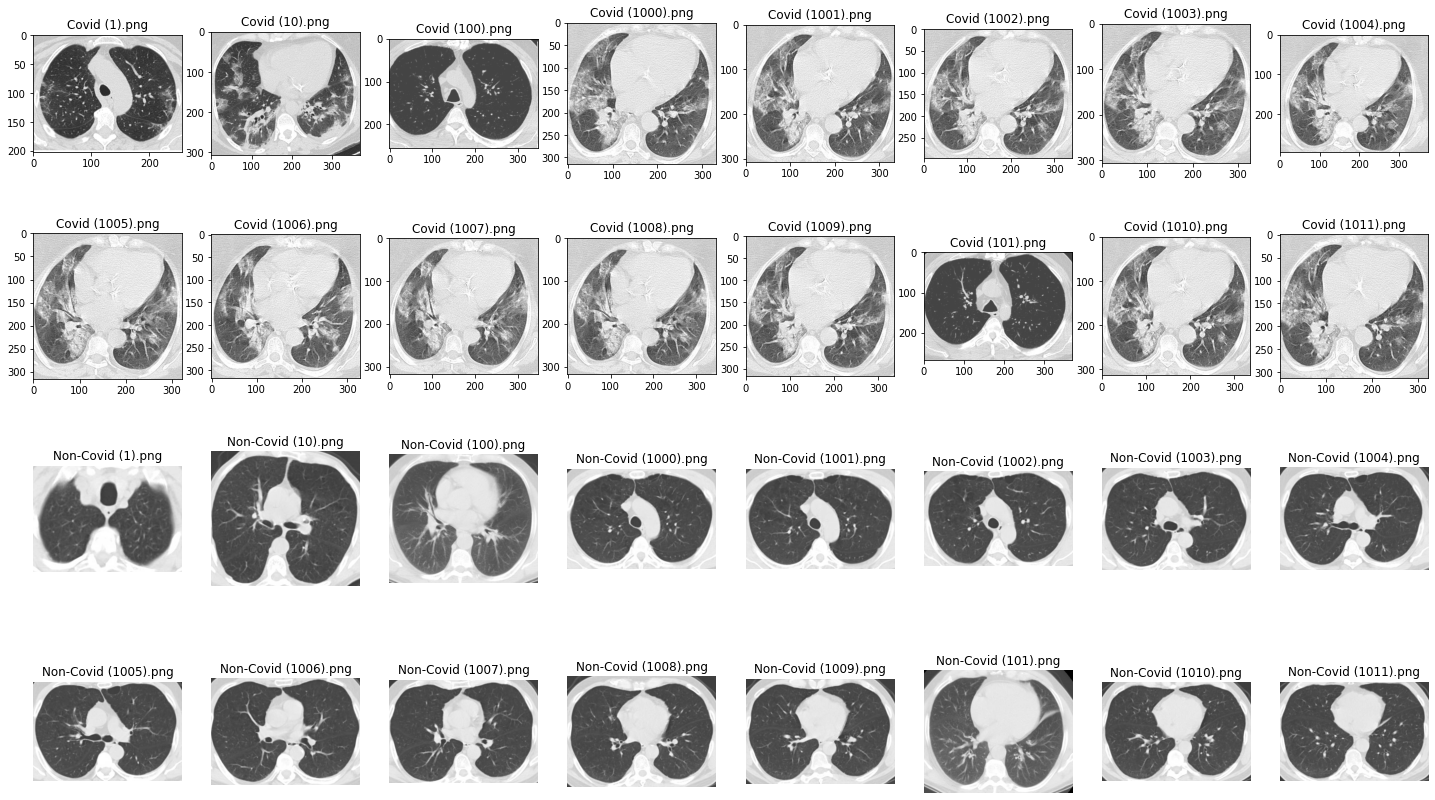

In [9]:
data = []
fig = plt.figure(figsize=[25,15])
for i in range(0,16):
    img = io.imread(prefix_pos+files_true[i])
    plt.subplot(4,8, i+1)
    plt.imshow(img)
#     plt.hist(img.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k')
    data.append([img.ravel(), 1])
    plt.title(files_true[i])
#     plt.axis(False)
for i in range(0,16):
    img = io.imread(prefix_neg+files_negative[i])
    plt.subplot(4,8, 16+i+1)
    plt.imshow(img)
#     plt.hist(img.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k')
    data.append([img.ravel(), 0])
    plt.title(files_negative[i])
    plt.axis(False)
plt.show()
# fig.savefig('histo.pdf', bbox_inches = 'tight', pad_inches = 0)

In [10]:
import numpy as np
def my_histogram(img):
    histo = np.zeros([256])
    for i in range(img.shape[0]):
        histo[int(img[i])] += 1
    return histo

In [11]:
from scipy.stats import kurtosis
from scipy.stats import skew

def features(histo):
    return np.min(histo), np.max(histo), np.mean(histo), np.median(histo), np.std(histo), skew(histo), kurtosis(histo)

In [12]:
data_features = []
for d in data:
    histo = my_histogram(d[0])
    data_features.append( features(histo) )

In [13]:
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3f" % x))
dataset = np.array(data_features)

In [14]:
import pandas as pd
pd_dataset = pd.DataFrame(dataset)#dataset

In [15]:
y = np.zeros([dataset.shape[0]])
y[0:16] = 1
y[16:32] = 0
print(y)

[1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]


In [25]:
def mydist(X,Y):
    acum = 0
    for i in range(0,X.shape[0]):
        acum += np.power(X[i]-Y[i],2)
    return acum

In [26]:
def create_graph(N_cluster, n_dataset, labels):
    v_G = []
#     print('line 0')
    for c in range(0, N_cluster):
#         print('line 1')
        G = nx.Graph()
        
        for i in range(0,n_dataset.shape[0]):
            for j in range(0,n_dataset.shape[0]):
                if( i != j and labels[i] == c and labels[j] == c ):
                    dist = mydist(n_dataset[i,:], n_dataset[j,:])
                    if dist == 0.0:
                        print('Aquii',n_dataset[i,:],n_dataset[j,:]) 
                    G.add_edge(i, j , weight = dist )
        v_G.append(G)
    return v_G

In [27]:
import networkx as nx
v_G = create_graph(2, dataset, y)

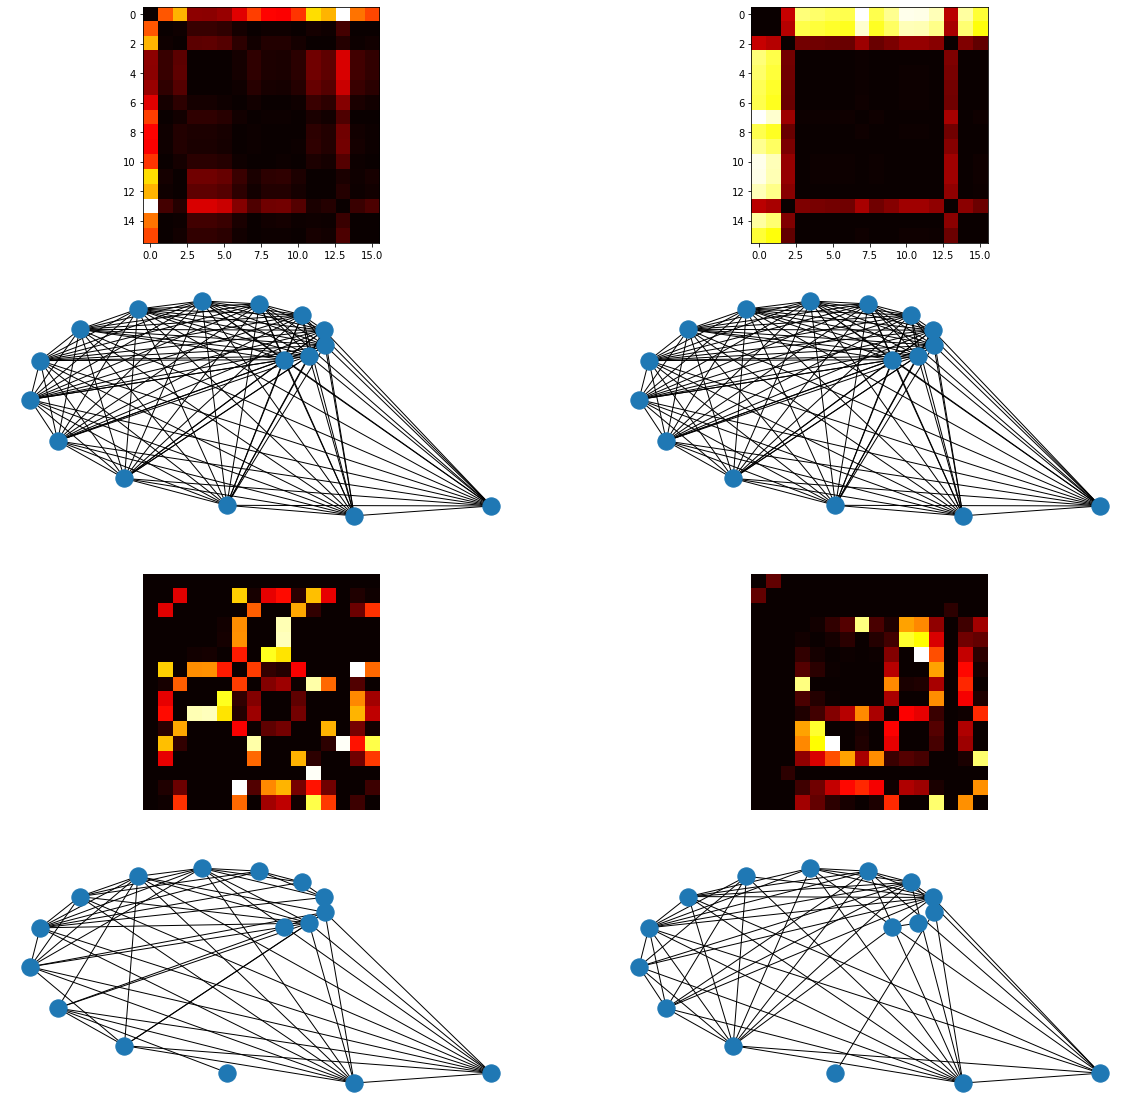

In [28]:
fig = plt.figure(figsize=[20,20])
idx = 1
for G in v_G:
    plt.subplot(4,2,idx)
    matrix = nx.adjacency_matrix(G)
    np_matrix = matrix.toarray()
    plt.imshow(np_matrix, cmap='hot')
#     plt.axis(False)
      
    plt.subplot(4,2,idx+2)
    pos = nx.spiral_layout(G)
    nx.draw(G, pos=pos)
    
    median = np.median(np.ravel(np_matrix))
    
#     G_1 = nx.Graph()
    for i in range(np_matrix.shape[0]):
        for j in range(np_matrix.shape[1]):
            if np_matrix[i,j] > median:
                np_matrix[i,j] = 0
                
    plt.subplot(4,2,idx+4)
    plt.imshow(np_matrix, cmap='hot')
    plt.axis(False)
    
    plt.subplot(4,2,idx+6)
    G1 = nx.from_numpy_matrix(np_matrix)
    pos = nx.spiral_layout(G1)
    nx.draw(G1, pos=pos)
    
    idx += 1
plt.show()
# fig.savefig('madj_graphs_covid19.2.pdf', bbox_inches = 'tight', pad_inches = 0)